# Obesity Prediction

# Introduction
Obesity is a complex and multifaceted health issue that affects millions of people worldwide. It is influenced by a combination of genetic, environmental, and lifestyle factors. Early detection and prevention of obesity are crucial for reducing the risk of related health problems, such as diabetes, heart disease, and certain types of cancer.This project aims to develop a machine learning model that predicts obesity based on a range of factors, including demographic characteristics, lifestyle habits, and family history. The dataset used in this project contains information on 17 variables, including:

- Demographic characteristics: Gender, Age, Height, Weight
- Family history: Family history of obesity
- Lifestyle habits:
    - Dietary patterns: Frequency of consumption of vegetables (FCVC), Frequency of consumption of alcohol (FAVC)
    - Physical activity levels: Sedentary behavior (SCC), Transportation used (TUE), Main mode of transportation (MTRANS)
    - Smoking habits: Smoking habits (SMOKE)
    - Hydration levels: Consumption of water per day (CH2O)
    - Calcium intake: Calcium intake per day (CALC)
    - Eating habits: Frequency of eating away from home (FAF), Number of main meals consumed per day (NCP)

##  Importing all the necessary libraries

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Reading the dataset and printing the head and tail

In [72]:
df=pd.read_csv(r"C:\Users\HP\Downloads\Obesity prediction.csv")

In [73]:
print(df.head().to_string())
print(df.tail().to_string())

   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS              Obesity
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes    no   2.0   no  0.0  1.0          no  Public_Transportation        Normal_Weight
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation        Normal_Weight
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently  Public_Transportation        Normal_Weight
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently                Walking   Overweight_Level_I
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation  Overweight_Level_II
      Gender        Age    Height      Weight family_histo

In [74]:
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


##  Checking Datatypes

In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [76]:
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

## Checking null values

In [77]:
print(df.isnull().sum())

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64


Now we check for outliers in each columns.

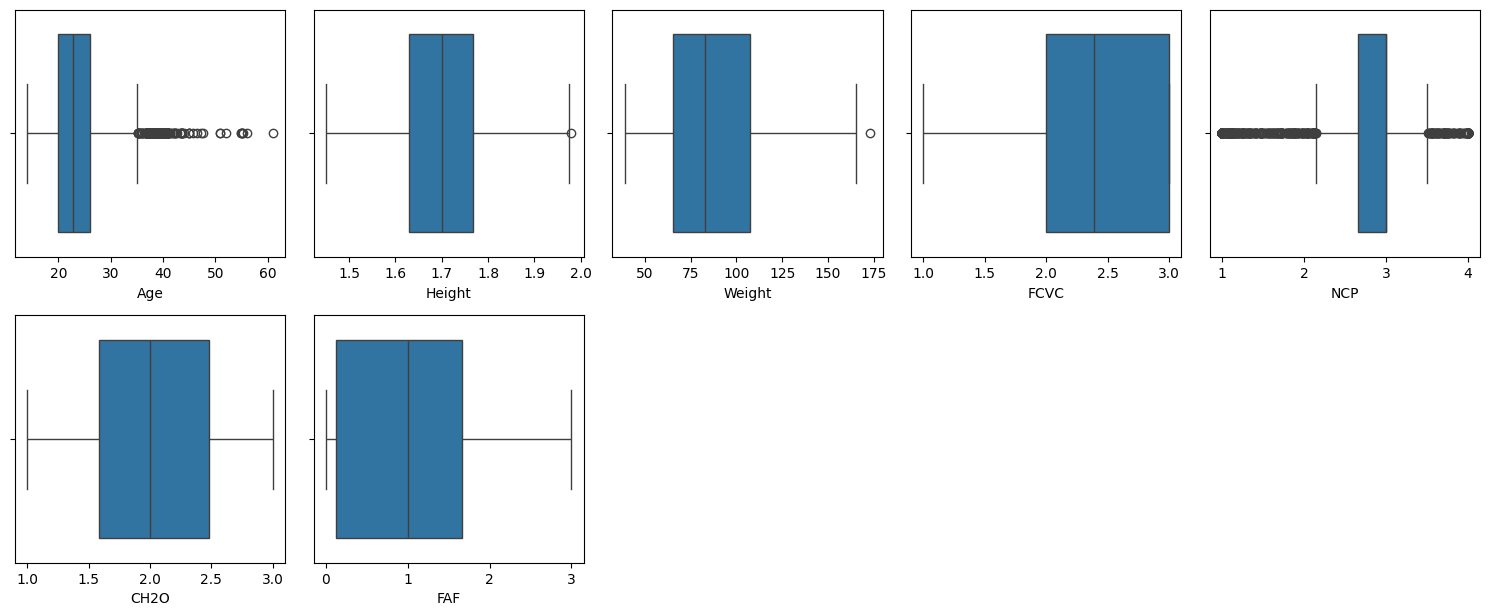

In [78]:
cols= df.select_dtypes(include=[np.number]).columns[:-1]
plt.figure(figsize=(15,15))
for count, col in enumerate(cols):
    plt.subplot(5,5,count+1)
    sns.boxplot(data=df, x=col)
plt.tight_layout()
plt.show()

Here we can see that there are many outliers over all the columns. So we will drop the outliers using the IQR rule

In [79]:
def get_whisker_bounds(df, column):
    fig, ax = plt.subplots()
    box = ax.boxplot(df[column].dropna(), vert=False)
    plt.close(fig)

    whiskers = [line.get_xdata()[1] for line in box['whiskers']]
    return whiskers[0], whiskers[1]

def remove_outliers_using_whiskers(df):
    df_clean = df.copy()
    outliers = {}

    for col in df.select_dtypes(include=[np.number]).columns:
            if col != 'NCP':
                lower_whisker, upper_whisker = get_whisker_bounds(df, col)
                outlier_count = ((df[col] < lower_whisker) | (df[col] > upper_whisker)).sum()
                outliers[col] = (lower_whisker, upper_whisker, outlier_count)

                df_clean = df_clean[(df_clean[col] >= lower_whisker) & (df_clean[col] <= upper_whisker)]

    outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Lower Whisker', 'Upper Whisker', 'No. of Outliers'])

    outliers_df
    return df_clean

df_cleaned = remove_outliers_using_whiskers(df)
print(f"\nOriginal shape: {df.shape}, New shape: {df_cleaned.shape}")


Original shape: (2111, 17), New shape: (1941, 17)


In [80]:
df=df_cleaned

Plotting the boxplot after dropping outlier rows

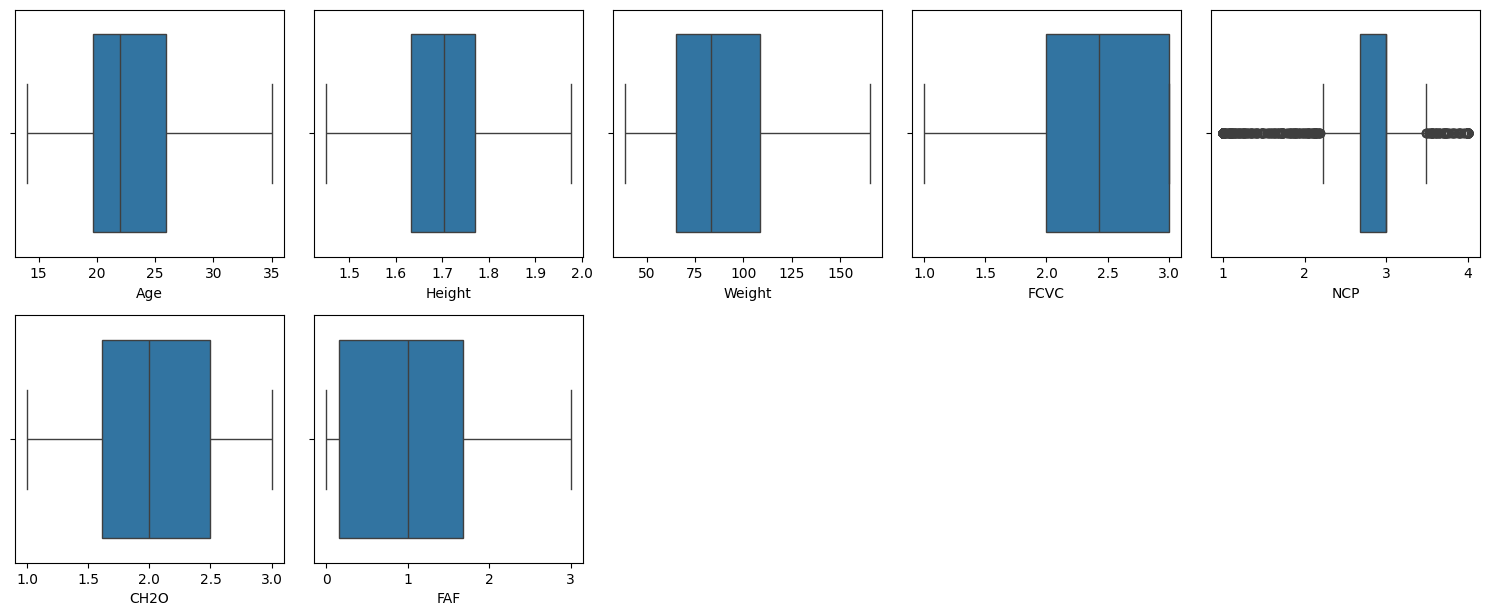

In [81]:
cols= df.select_dtypes(include=[np.number]).columns[:-1]
plt.figure(figsize=(15,15))
for count, col in enumerate(cols):
    plt.subplot(5,5,count+1)
    sns.boxplot(data=df, x=col)
plt.tight_layout()
plt.show()

Now we plot the correlation matrix of the dataset.

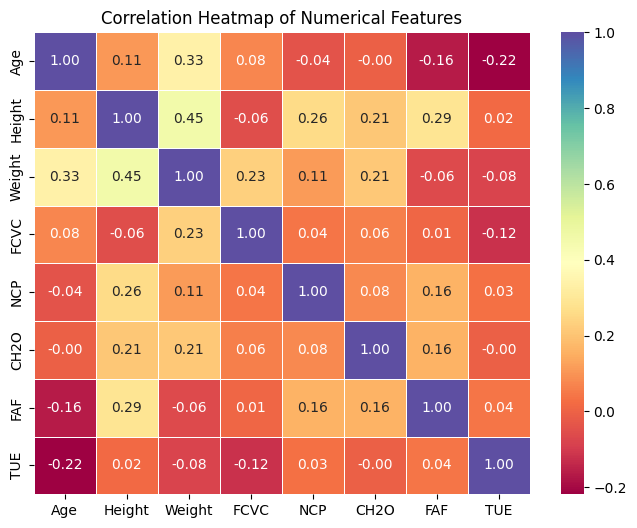

In [82]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix=numerical_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)


plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Now we begin Machine Learning

Splitting the feature and target variables

In [83]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [84]:
print(df.head().to_string())

   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS              Obesity
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes    no   2.0   no  0.0  1.0          no  Public_Transportation        Normal_Weight
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation        Normal_Weight
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently  Public_Transportation        Normal_Weight
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently                Walking   Overweight_Level_I
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation  Overweight_Level_II


Encoding the target variable as it is the only categorical variable

In [85]:
lab_enc=LabelEncoder()
y=lab_enc.fit_transform(y)
print(y)



[1 1 1 ... 4 4 4]


In [86]:
output_map={
    'Insufficient_Weight':0,
    'Normal_Weight':1,
    'Obesity_Type_I':2,
    'Obesity_Type_II':3,
    'Obesity_Type_III':4,
    'Overweight_Level_I':5,
    'Overweight_Level_II':6
}

reverse_output_map = {v: k for k, v in output_map.items()}



In [87]:
Gender_Encoder=LabelEncoder()
family_history_Encoder=LabelEncoder()
FAVC_Encoder=LabelEncoder()
CAEC_Encoder=LabelEncoder()
SMOKE_Encoder=LabelEncoder()
SCC_Encoder=LabelEncoder()
CALC_Encoder=LabelEncoder()
MTRANS_Encoder=LabelEncoder()

x['Gender']=Gender_Encoder.fit_transform(x['Gender'])
x['family_history']=family_history_Encoder.fit_transform(x['family_history'])
x['FAVC']=FAVC_Encoder.fit_transform(x['FAVC'])
x['CAEC']=CAEC_Encoder.fit_transform(x['CAEC'])
x['SMOKE']=SMOKE_Encoder.fit_transform(x['SMOKE'])
x['SCC']=SCC_Encoder.fit_transform(x['SCC'])
x['CALC']=CALC_Encoder.fit_transform(x['CALC'])
x['MTRANS']=MTRANS_Encoder.fit_transform(x['MTRANS'])


print(pd.DataFrame(x).head(2).to_string(index=False))

 Gender  Age  Height  Weight  family_history  FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS
      0 21.0    1.62    64.0               1     0   2.0  3.0     2      0   2.0    0  0.0  1.0     3       3
      0 21.0    1.52    56.0               1     0   3.0  3.0     2      1   3.0    1  3.0  0.0     2       3


Splitting the training and testing data

In [88]:
x_test, x_train, y_test, y_train= train_test_split(
    x, y, random_state=0, test_size=0.2
)

Scaling the values of x for the algorithms that required scaled x values

In [89]:
ss_x = StandardScaler()
scaled_x_train = ss_x.fit_transform(x_train)
scaled_x_test = ss_x.transform(x_test)

Now we take each of the algorithms, and we do hyperparameter tuning to get the best parameters for the given dataset. We are using Grid Search for this purpose.

1.<strong> Decision Tree Classifier </strong>

In [90]:
dtc=DecisionTreeClassifier()
param_dtc = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None, 'sqrt', 'log2'],  
    'splitter': ['best', 'random'],  
}

gridCLF=GridSearchCV(dtc, param_dtc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(x_train, y_train)
# print(gridCLF.best_params_)

# {'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}


2. <strong> Random Forest Classifier </strong>

In [91]:
rfc = RandomForestClassifier()


param_rfc = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2', None], 
    'bootstrap': [True, False], 
    'criterion': ['gini', 'entropy'],
}


gridCLF = GridSearchCV(rfc, param_rfc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(x_train, y_train)
# print( gridCLF.best_params_)

# {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

3. <strong>KNN Classifier </strong>

In [92]:
knn = KNeighborsClassifier()


param_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 20, 30, 40] 
}


gridCLF = GridSearchCV(knn, param_knn, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(scaled_x_train, y_train)
# print( gridCLF.best_params_)

# {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

4. <strong> SVM Classifier </strong>

In [93]:
svc = SVC()


param_svc = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Specifies the kernel type to be used
    'degree': [3, 4, 5],  # Degree of the polynomial kernel function (used when kernel='poly')
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'class_weight': [None, 'balanced']  # Handles class imbalance if necessary
}


gridCLF = GridSearchCV(svc, param_svc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(scaled_x_train, y_train)
# print(gridCLF.best_params_)

# {'C': 100, 'class_weight': None, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}

5. <strong>Gaussian Naive-Bayesian Classifier </strong>

In [94]:
gnb = GaussianNB()


param_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] 
}


gridCLF = GridSearchCV(gnb, param_gnb, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(scaled_x_train, y_train)
# print( gridCLF.best_params_)

# {'var_smoothing': 1e-05}

In [95]:
{'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
{'C': 100, 'class_weight': None, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
{'var_smoothing': 1e-05}


{'var_smoothing': 1e-05}

Now we create a function to return the accuracy measures and error metrics after training the algorithm. We also create a dictionary for referencing each algorithms

In [96]:
def model_evaluation(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuuracy = metrics.accuracy_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    return accuuracy, mae, rmse


models = {
    "Decision Tree Classifier": DecisionTreeClassifier(criterion ='entropy', max_depth =30, max_features= None, min_samples_leaf =1, min_samples_split=2 , splitter= 'best'),
    "Random Forest Classifier": RandomForestClassifier(bootstrap =True, criterion='entropy', max_depth =20, max_features= None,min_samples_leaf= 2, min_samples_split= 2, n_estimators =200),
    "KNN Classifier": KNeighborsClassifier(algorithm ='auto', leaf_size =10, metric ='manhattan', n_neighbors= 3, weights ='distance'),
    "SVC Classifier": SVC(C =100, class_weight= None, degree= 3, gamma ='scale', kernel= 'linear'),
    "Gaussian Naive-Bayesian Classifier": GaussianNB(var_smoothing= 1e-05)
}

Now we call the above created function, and change up the x data according to the algorithm used. Also the results of the evaluation is stored into the results_df.

In [97]:
results = []


for model_name, model in models.items():
    if model_name == "KNN Classifier" or model_name == "SVC Classifier":
        accuracy, mae, rmse = model_evaluation(model, scaled_x_train, scaled_x_test, y_train, y_test)
    else:
        accuracy, mae, rmse = model_evaluation(model, x_train, x_test, y_train, y_test)
    
    results.append({
        "Model": model_name,
        "Accuracy Score": accuracy,
        "Mean Absolute Error": mae,
        "Root Mean Squared Error": rmse
    })


results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

                             Model  Accuracy Score  Mean Absolute Error  Root Mean Squared Error
          Decision Tree Classifier        0.876289             0.307990                 1.027333
          Random Forest Classifier        0.917526             0.217139                 0.872327
                    KNN Classifier        0.778995             0.584407                 1.440173
                    SVC Classifier        0.956830             0.101160                 0.580504
Gaussian Naive-Bayesian Classifier        0.610180             1.078608                 2.017961


Visualizing the results (Accuracy Score, Root Mean Squared Error and Mean Absolute Error)

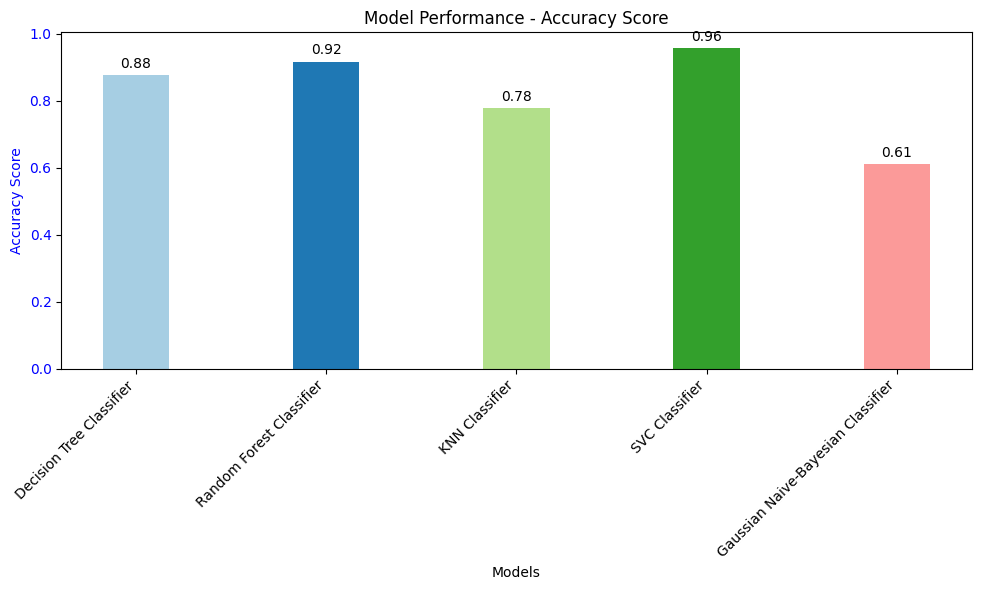

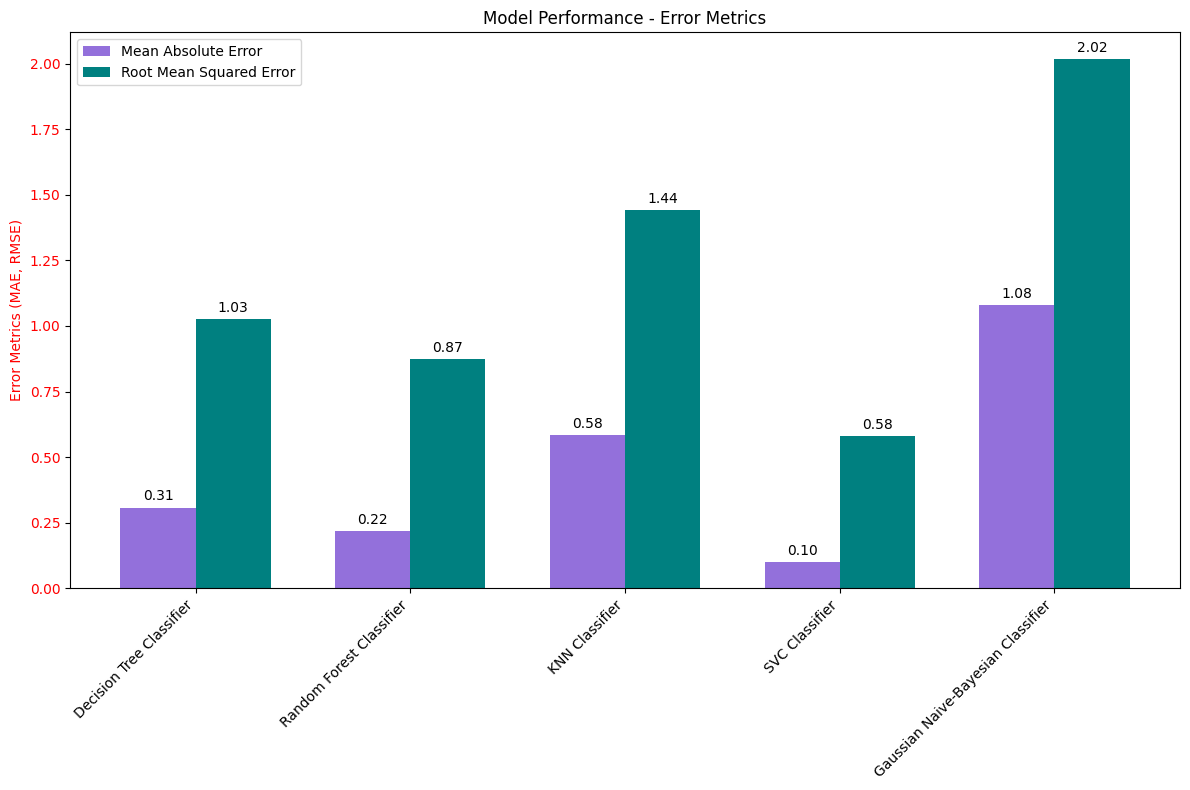

In [98]:
model_names = results_df['Model'] 
accuracy_values = results_df['Accuracy Score']
mae_values = results_df['Mean Absolute Error']
rmse_values = results_df['Root Mean Squared Error']

x = np.arange(len(model_names))  
width = 0.35  

fig, ax1 = plt.subplots(figsize=(10, 6))
bar_accuracy = ax1.bar(x, accuracy_values, width, color=plt.cm.Paired.colors[:len(model_names)], label='Accuracy Score')

ax1.set_title('Model Performance - Accuracy Score')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy Score', color='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')

for bar in bar_accuracy:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()

fig, ax2 = plt.subplots(figsize=(12, 8))
bar_mae = ax2.bar(x - width / 2, mae_values, width, label='Mean Absolute Error', color='mediumpurple')
bar_rmse = ax2.bar(x + width / 2, rmse_values, width, label='Root Mean Squared Error', color='teal')

ax2.set_ylabel('Error Metrics (MAE, RMSE)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_xticks(x)
ax2.set_xticklabels(model_names, rotation=45, ha='right')
ax2.set_title('Model Performance - Error Metrics')

for bars in [bar_mae, bar_rmse]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

ax2.legend()

plt.tight_layout()
plt.show()


Creating a custom input and classifying the output

In [99]:
Gender="Female"
Age=22
Height=1.5
Weight=87
family_history="yes"
FAVC="no"
FCVC=2
NCP=3
CAEC="Sometimes"
SMOKE="yes" 
CH2O=2
SCC="no"
FAF=0
TUE=2
CALC="no"
MTRANS="Walking"
x_custom=np.array([[Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS]], dtype=object)


Formating the input

In [100]:
x_custom[:, 0] = Gender_Encoder.transform(x_custom[:, 0])  
x_custom[:, 4] = family_history_Encoder.transform(x_custom[:, 4])
x_custom[:, 5] = FAVC_Encoder.transform(x_custom[:, 5])
x_custom[:, 8] = CAEC_Encoder.transform(x_custom[:, 8])
x_custom[:, 9] = SMOKE_Encoder.transform(x_custom[:, 9])
x_custom[:, 11] = SCC_Encoder.transform(x_custom[:, 11])
x_custom[:, 14] = CALC_Encoder.transform(x_custom[:, 14])
x_custom[:, 15] = MTRANS_Encoder.transform(x_custom[:, 15])


In [101]:
print(x_custom)

[[0 22 1.5 87 1 0 2 3 2 1 2 0 0 2 3 4]]


In [102]:
y_custom=models['SVC Classifier'].predict(x_custom)
print("Custom input prediction:",reverse_output_map.get(y_custom[0]))

Custom input prediction: Obesity_Type_III


<h2>Conclusion </h2>
<br>
This project implemented various classification models to identify the most effective algorithm for predicting the given target variable.The model identified key predictors, including family history, sedentary behavior, and poor dietary habits. These findings can inform targeted interventions and public health policy aimed at reducing obesity prevalence. By leveraging machine learning techniques, this project demonstrated the potential for data-driven approaches to address complex health issues like obesity.